In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

## Problem: Finding min and max of f(x,y) = 2x + y² on the ellipse 2x² + y² = 2

**Question:** What is the minimum and maximum of this function considering the ellipse constraint? How do we visualize this in 3D?

### Understanding the 3D Visualization

You're right that the ellipse is "flat" in 2D space - it's a curve in the xy-plane (where z = 0). The function f(x,y) = 2x + y² creates a 3D surface above and below this plane.

**What we're looking for:** The points on the ellipse where the function f has its highest and lowest values. Imagine the ellipse as a path you must walk on, and f(x,y) tells you your elevation at each point.

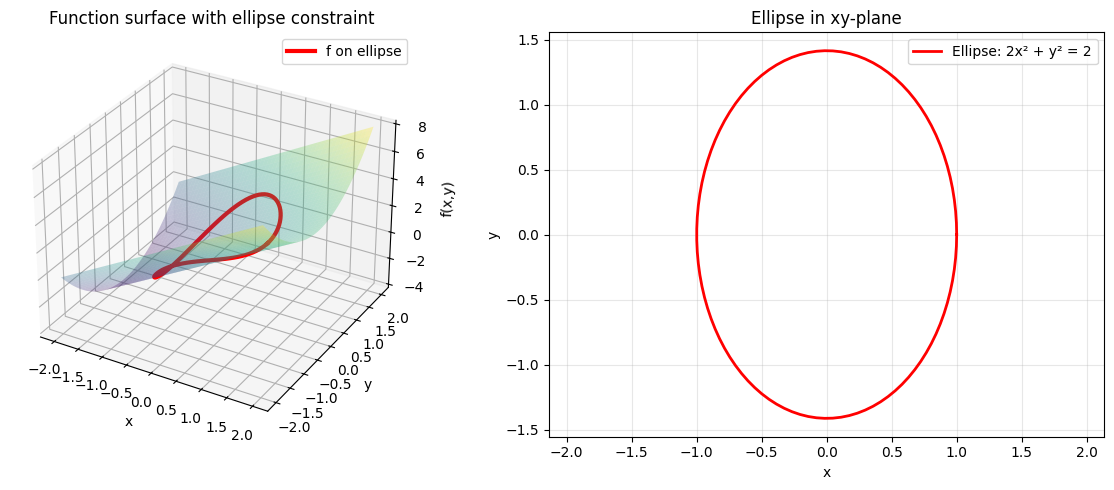

In [2]:
# Create the 3D surface for f(x,y) = 2x + y²
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = 2*X + Y**2  # The function

# Create the ellipse constraint: 2x² + y² = 2
theta = np.linspace(0, 2*np.pi, 100)
x_ellipse = np.sqrt(2/2) * np.cos(theta)  # From 2x² + y² = 2
y_ellipse = np.sqrt(2) * np.sin(theta)
z_ellipse = 2*x_ellipse + y_ellipse**2  # Height of function ON the ellipse

# Plot
fig = plt.figure(figsize=(12, 5))

# View 1: 3D surface with ellipse curve
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis')
ax1.plot(x_ellipse, y_ellipse, z_ellipse, 'r-', linewidth=3, label='f on ellipse')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Function surface with ellipse constraint')
ax1.legend()

# View 2: Top-down view showing ellipse in xy-plane
ax2 = fig.add_subplot(122)
ax2.plot(x_ellipse, y_ellipse, 'r-', linewidth=2, label='Ellipse: 2x² + y² = 2')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.axis('equal')
ax2.set_title('Ellipse in xy-plane')
ax2.legend()

plt.tight_layout()
plt.show()

### Interpretation

The **red curve** in the 3D plot shows the height of f(x,y) as you walk around the ellipse. 

- The **maximum** is the highest point on this red curve
- The **minimum** is the lowest point on this red curve

You're constrained to stay on the ellipse (the red curve in xy-plane), but f(x,y) varies in the z-direction as you move along it.

### Is the ellipse a cylinder through the z-axis?

**Question:** Is the ellipse constraint like a cylinder extending through the entire z-axis, and we're interested in where it intersects the function surface?

**Yes, exactly!** 

The constraint 2x² + y² = 2 doesn't mention z, so it's satisfied for ANY value of z. This creates an **elliptical cylinder** that extends infinitely in both directions along the z-axis.

The intersection of this cylinder with the surface f(x,y) = 2x + y² gives us the red curve - the set of points that satisfy both:
1. The constraint (being on the ellipse)
2. The function value at those points

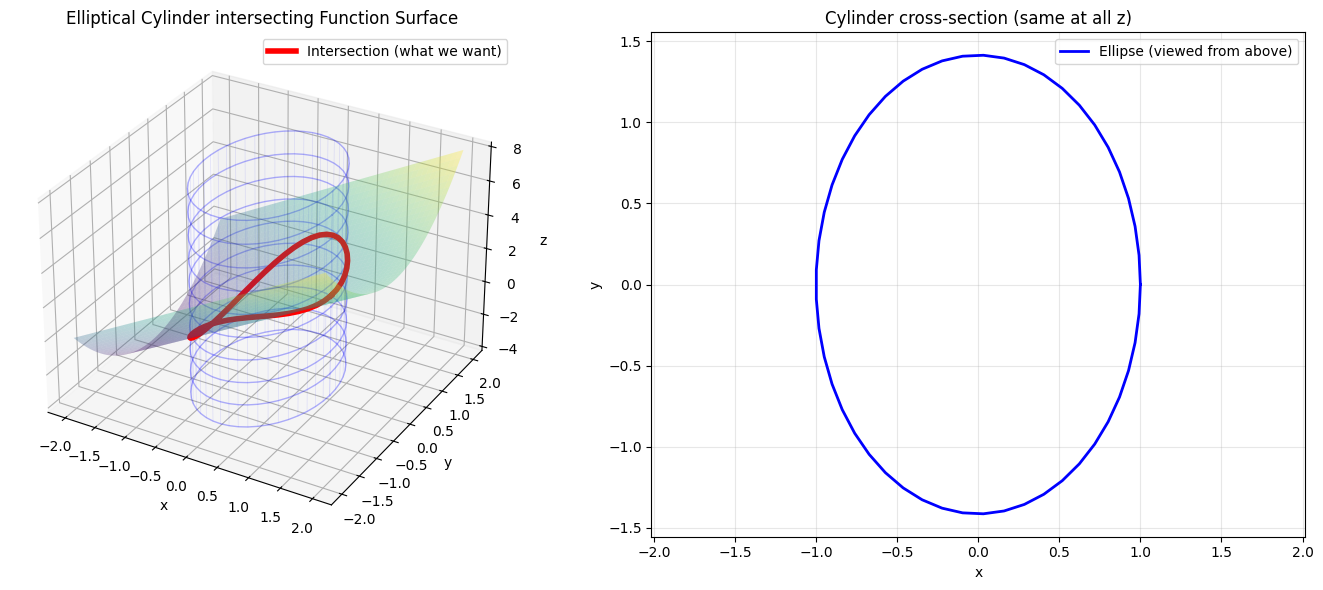

In [3]:
# Visualize the elliptical cylinder
fig = plt.figure(figsize=(14, 6))

# Create ellipse points at different z-heights to show cylinder
theta = np.linspace(0, 2*np.pi, 50)
x_ell = np.sqrt(2/2) * np.cos(theta)
y_ell = np.sqrt(2) * np.sin(theta)

# Left plot: Show the cylinder
ax1 = fig.add_subplot(121, projection='3d')

# Draw ellipses at multiple z-levels to show cylinder
z_levels = np.linspace(-4, 8, 10)
for z_val in z_levels:
    ax1.plot(x_ell, y_ell, z_val*np.ones_like(x_ell), 'b-', alpha=0.3, linewidth=1)

# Connect them to show cylinder surface
for i in range(len(theta)):
    ax1.plot([x_ell[i], x_ell[i]], [y_ell[i], y_ell[i]], [-4, 8], 'b-', alpha=0.1, linewidth=0.5)

# Add the function surface
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = 2*X + Y**2
ax1.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis')

# The intersection curve (red)
z_ellipse = 2*x_ell + y_ell**2
ax1.plot(x_ell, y_ell, z_ellipse, 'r-', linewidth=4, label='Intersection (what we want)')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Elliptical Cylinder intersecting Function Surface')
ax1.legend()

# Right plot: Top-down view
ax2 = fig.add_subplot(122)
ax2.plot(x_ell, y_ell, 'b-', linewidth=2, label='Ellipse (viewed from above)')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.axis('equal')
ax2.set_title('Cylinder cross-section (same at all z)')
ax2.legend()

plt.tight_layout()
plt.show()

### Finn Lagrange ligningene

**Spørsmål:** Jeg får:
- 2 = λ·4x
- 2y = 2y·λ
- 2x² + y² - 2 = 0

Kan lambda være fri, eller har jeg gjort feil?

**Du har satt opp ligningene riktig!**

Lagrange-metoden gir oss:
- ∇f = λ∇g
- Pluss bibetingelsen g(x,y) = 0

For f(x,y) = 2x + y² og g(x,y) = 2x² + y² - 2:

In [6]:
# Verifiser gradientene
import sympy as sp

x, y, lam = sp.symbols('x y lambda')

# Funksjonen og bibetingelsen
f = 2*x + y**2
g = 2*x**2 + y**2 - 2

# Beregn gradienter
grad_f = [sp.diff(f, x), sp.diff(f, y)]
grad_g = [sp.diff(g, x), sp.diff(g, y)]

print("∇f =", grad_f)
print("∇g =", grad_g)
print("\nLagrange ligninger:")
print(f"∇f_x = λ·∇g_x  →  {grad_f[0]} = λ·{grad_g[0]}")
print(f"∇f_y = λ·∇g_y  →  {grad_f[1]} = λ·{grad_g[1]}")
print(f"Bibetingelse:    {g} = 0")

∇f = [2, 2*y]
∇g = [4*x, 2*y]

Lagrange ligninger:
∇f_x = λ·∇g_x  →  2 = λ·4*x
∇f_y = λ·∇g_y  →  2*y = λ·2*y
Bibetingelse:    2*x**2 + y**2 - 2 = 0


**Om lambda (λ):**

Lambda er IKKE fri - den er en ukjent vi må løse for sammen med x og y. Vi har 3 ligninger og 3 ukjente (x, y, λ):

1. 2 = 4λx
2. 2y = 2λy  
3. 2x² + y² = 2

Merk spesielt ligning 2: **2y = 2λy** kan faktoriseres til **2y(1 - λ) = 0**, som gir to tilfeller!

# Løste problemet